# 3주차 과제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [139]:
df_train = pd.read_csv("train.csv")

In [140]:
df_train

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [141]:
print(df_train.info())
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [142]:
df_train.isnull().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

- 기온, 풍속, 게절 피처에 결측값 존재
    - 기온 및 풍속은 시간별로 나열된 데이터임을 감안하여 보간법을 사용
    - 계절은 날짜에 맞은 게절을 채워 넣으면 될 듯 하다.

In [143]:
print("계절 정보 : \n",df_train["Seasons"].value_counts())
print("휴일 정보 : \n",df_train["Holiday"].value_counts())
print("기능 정보 : \n",df_train["Functioning Day"].value_counts())

계절 정보 : 
 Seasons
Spring    1990
Summer    1990
Winter    1935
Autumn    1323
Name: count, dtype: int64
휴일 정보 : 
 Holiday
No Holiday    7608
Holiday        432
Name: count, dtype: int64
기능 정보 : 
 Functioning Day
Yes    7817
No      223
Name: count, dtype: int64


- 범주형 자료들로 변수 인코딩이 필요해 보인다.

<Axes: ylabel='Temperature(째C)'>

/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


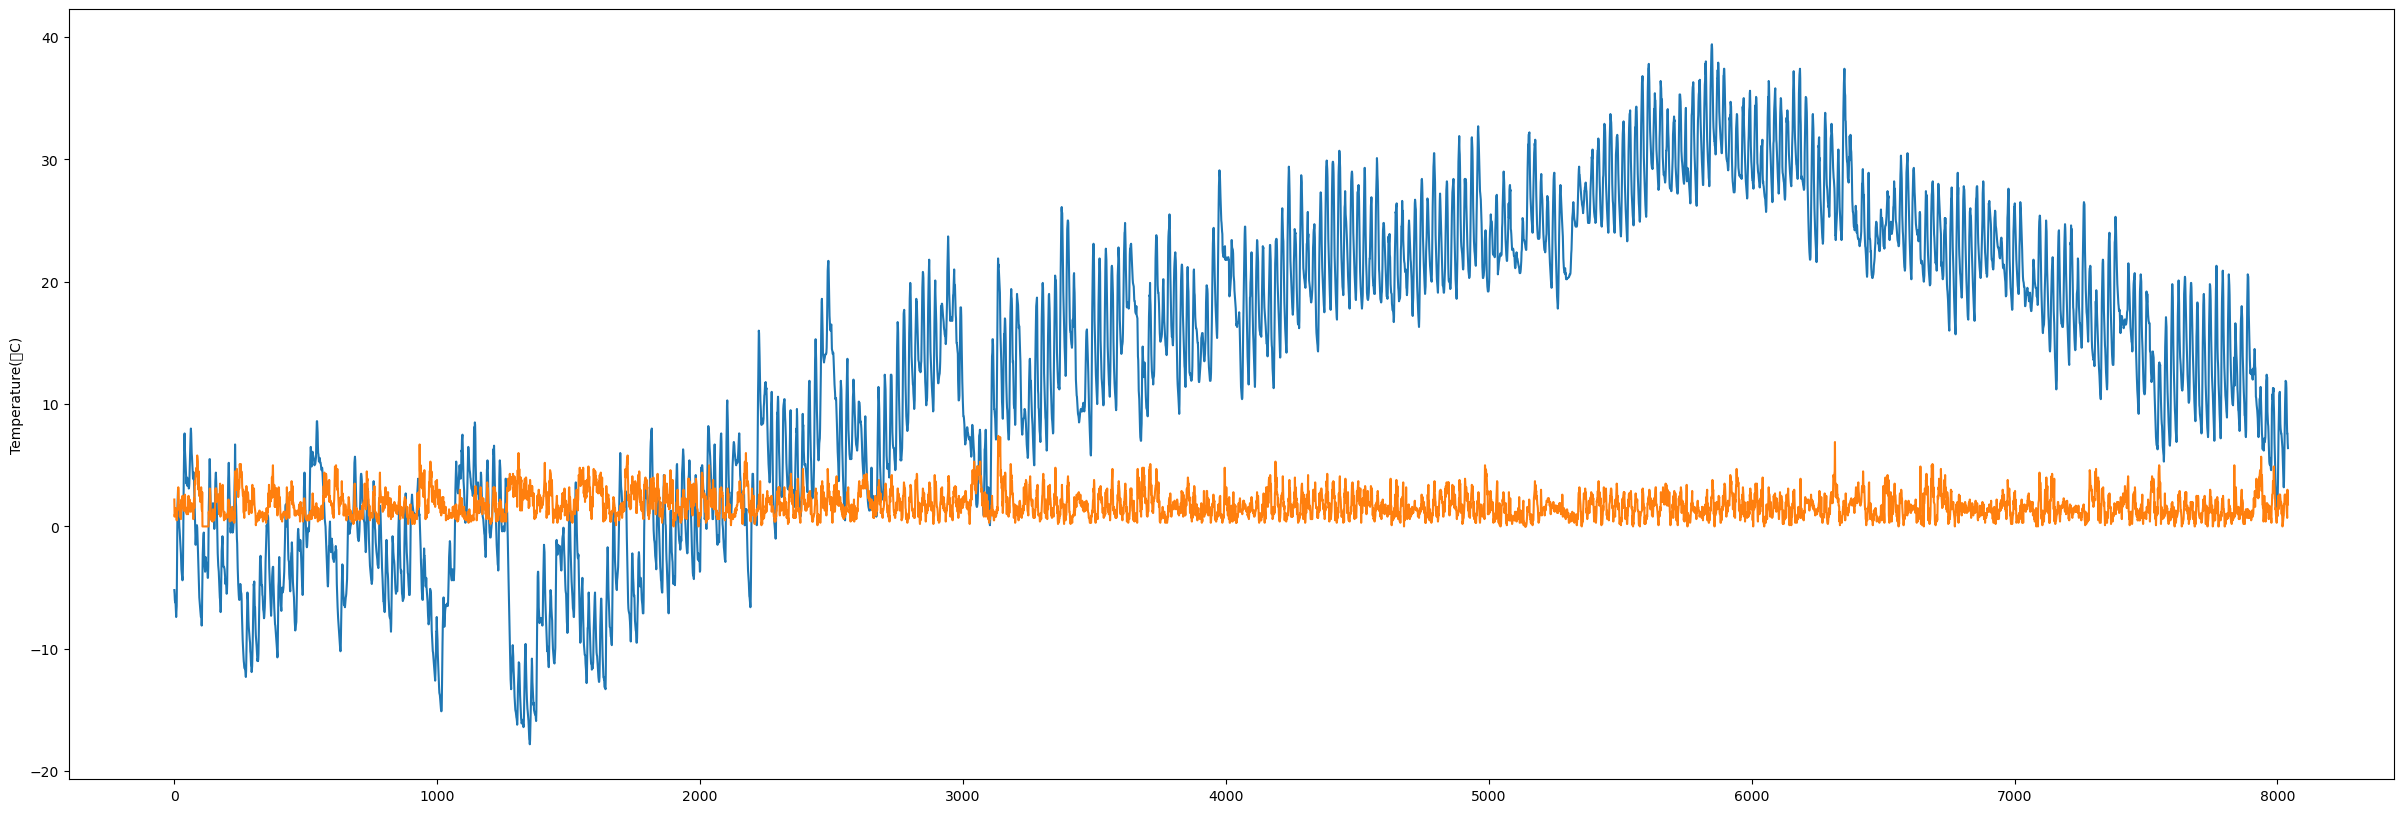

In [144]:
## 시각화
m, n = df_train.shape
x = np.linspace(1, m, m)

plt.figure(figsize=(30, 10))
sns.lineplot(data = df_train, x = x, y = "Temperature(째C)")
sns.lineplot(data = df_train, x = x, y = "Wind speed (m/s)")

In [145]:
## 시게열 데이터로 1차 선형 보간법을 사용

In [146]:
df_train = df_train.interpolate(method= "linear")

In [148]:
df_train.groupby("Seasons")[["Date"]].agg([min, max])

Date            
                min         max
Seasons                        
Autumn   01/09/2018  31/10/2018
Spring   01/03/2018  31/05/2018
Summer   01/06/2018  31/08/2018
Winter   01/01/2018  31/12/2017

- 데이터에 11월이 제외되어있는 것을 고려했을 월별 계절
    -  3 ~  5 : spring
    -  6 ~  8 : summer
    -  9 ~ 11 : autumn
    - 12 ~  2 : winter

In [149]:
df_train["Date"] = pd.to_datetime(df_train["Date"], format= "%d/%m/%Y")
df_train["Date"].dt.year
df_train["Date"].dt.month
#df_train["Date"].dt.day

0       12
1       12
2       12
3       12
4       12
        ..
8035    10
8036    10
8037    10
8038    10
8039    10
Name: Date, Length: 8040, dtype: int32

In [150]:
df_train[df_train["Seasons"].isnull()]

## map 함수를 사용하여 효율적으로 채워넣기

season = {
    12 : "Winter", 1 : "Winter", 2 : "Winter",
    9  : "Autumn", 10: "Autumn", 11: "Autumn",
    6  : "Summer", 7 : "Summer", 8 : "Summer",
    3  : "Spring", 4 : "Spring", 5 : "Spring"
}
df_train["Seasons"].fillna(df_train["Date"].dt.month.map(season), inplace=True)


In [151]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(째C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(째C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    8040 non-null   object        
 12  Holida

-  결측치를 모두 처리한 것을 확인할 수 있다.

#### decompose 패키지를 이용한 시계열 이상치 탐지
- 기온, 습도, 풍속, 가시거리, 이슬점, 일조량을 확인

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose
    

def detect_outliers_STL(df, feature, period):  

    ## STL decomposition
    result = seasonal_decompose(df[feature], model='additive', period = period)
    

    ## plotting
    plt.figure(figsize=(10,5))
    result.plot()
    plt.show()

    ## 이상치 탐색
    residuals = result.resid
    outliers = residuals[abs(residuals) > 3 *residuals.std()] ## 계절성 패턴은 이상치가 유효한 패턴일 수도 있으므로 기준을 2 > 3으로 완화
    
    return outliers

/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.tight_layout()


<Figure size 1000x500 with 0 Axes>

/opt/anaconda3/envs/ML_practice/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


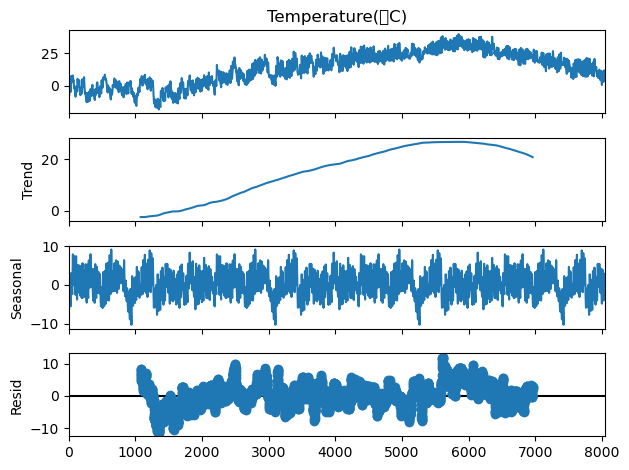

In [ ]:
# 3개월 계절을 기준으로

## 기온
Temp_anomaly = detect_outliers_STL(df_train, "Temperature(째C)", 720 * 3) 


In [184]:
df_train.loc[Temp_anomaly.index]

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1331,2018-01-25,122,11,-13.80,25,3.5,1996,-29.6,0.91,0.0,0.6,Winter,No Holiday,Yes
1332,2018-01-25,142,12,-12.80,25,3.2,1981,-28.7,1.16,0.0,0.6,Winter,No Holiday,Yes
1333,2018-01-25,130,13,-11.40,27,3.9,2000,-26.7,1.26,0.0,0.6,Winter,No Holiday,Yes
1334,2018-01-25,160,14,-10.40,25,2.3,1981,-26.7,1.21,0.0,0.5,Winter,No Holiday,Yes
1335,2018-01-25,130,15,-9.70,28,3.7,2000,-24.8,1.00,0.0,0.5,Winter,No Holiday,Yes
1337,2018-01-25,170,17,-10.90,32,4.0,2000,-24.4,0.28,0.0,0.5,Winter,No Holiday,Yes
1338,2018-01-25,288,18,-11.80,33,4.0,2000,-24.8,0.04,0.0,0.5,Winter,No Holiday,Yes
1353,2018-01-26,149,9,-17.50,37,3.8,1941,-28.7,0.21,0.0,0.5,Winter,No Holiday,Yes
1354,2018-01-26,96,10,-16.50,33,3.4,1703,-29.0,0.62,0.0,0.5,Winter,No Holiday,Yes
1355,2018-01-26,93,11,-15.60,31,3.3,1808,-28.9,0.93,0.0,0.5,Winter,No Holiday,Yes


- 매우 추웠거나 매우 더운 날일뿐 특별한 이상치로 확인되지는 않는다.

<Figure size 1000x500 with 0 Axes>

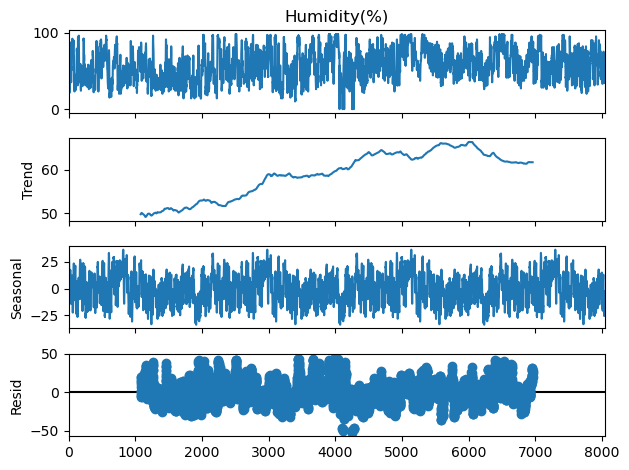

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3445,2018-04-23,11,13,9.3,95,2.300000,419,8.5,0.40,2.5,0.0,Spring,No Holiday,Yes
3446,2018-04-23,17,14,9.4,96,2.600000,304,8.7,0.39,4.0,0.0,Spring,No Holiday,Yes
3662,2018-05-02,376,14,17.1,94,0.300000,436,16.5,0.35,0.0,0.0,Spring,No Holiday,Yes
3997,2018-05-16,151,13,21.8,97,2.400000,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes
3998,2018-05-16,248,14,22.0,96,2.900000,1327,21.3,0.39,0.0,0.0,Spring,No Holiday,Yes
3999,2018-05-16,240,15,22.0,96,2.900000,313,21.3,0.20,0.0,0.0,Spring,No Holiday,Yes
4000,2018-05-16,223,16,21.8,97,1.800000,206,21.2,0.18,0.0,0.0,Spring,No Holiday,Yes
4020,2018-05-17,467,12,21.7,96,0.800000,1773,21.0,0.81,1.5,0.0,Spring,No Holiday,Yes
4106,2018-05-21,262,2,13.9,0,0.900000,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,Yes
4107,2018-05-21,165,3,13.0,0,0.800000,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes


In [187]:
## 습도
Humidity_anomaly = detect_outliers_STL(df_train, "Humidity(%)", 720 *3)

df_train.loc[Humidity_anomaly.index]

- 습도가 90프로가 넘어가는 수치일때는 비가 오거나, 안개 등의 상황이 있을 수 있다. 실제로 높은 습도일때 강수량이 잡히는 것을 확인해 볼 수 있다.
- 그러나 습도가 0프로라는 것은 이상하다. 확인이 필요해 보인다.

In [ ]:
## 습도가 0인 부분의 주변값을 확인하여 확인해보자
 
df_train.loc[np.r_[4100:4121, 4250:4261, 4270:4286]]


,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
4100,2018-05-20,1846,20,19.00,26,1.650000,2000,-0.9,0.02,0.0,0.0,Spring,No Holiday,Yes
4101,2018-05-20,1636,21,17.80,26,1.300000,2000,-1.9,0.00,0.0,0.0,Spring,No Holiday,Yes
4102,2018-05-20,1325,22,16.80,29,1.200000,2000,-1.3,0.00,0.0,0.0,Spring,No Holiday,Yes
4103,2018-05-20,943,23,15.80,30,1.100000,2000,-1.7,0.00,0.0,0.0,Spring,No Holiday,Yes
4104,2018-05-21,666,0,15.30,29,1.300000,2000,-2.6,0.00,0.0,0.0,Spring,No Holiday,Yes
4105,2018-05-21,420,1,14.60,31,1.100000,2000,-2.4,0.00,0.0,0.0,Spring,No Holiday,Yes
4106,2018-05-21,262,2,13.90,0,0.900000,2000,-2.1,0.00,0.0,0.0,Spring,No Holiday,Yes
4107,2018-05-21,165,3,13.00,0,0.800000,2000,-2.5,0.00,0.0,0.0,Spring,No Holiday,Yes
4108,2018-05-21,113,4,12.40,0,0.800000,2000,-3.4,0.00,0.0,0.0,Spring,No Holiday,Yes
4109,2018-05-21,200,5,11.90,0,1.300000,2000,-2.7,0.00,0.0,0.0,Spring,No Holiday,Yes


- 역시 습도가 급격하게 변하는 것을 확인할 수 있다.
- 습도가 0인것은 결측치로 보고 보간법으로 채워 넣으면 될듯 하다.

In [191]:
## 풍속
# Wind speed (m/s)          

detect_outliers_STL(df_train, "Wind speed (m/s)")

In [192]:
## 가시거리
## Visibility (10m)  

In [193]:
## 이슬점
## Dew point temperature(째C)

In [ ]:
## 일조량
## Solar Radiation (MJ/m2) 